In [53]:
import seaborn as sns
import nltk
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
encoder = LabelEncoder()

In [3]:
df = pd.read_csv('E:\Mail Classifier and recommender\spam.csv', encoding='latin-1')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\heyia\AppData\Local\Temp\ipykernel_34468\3875421181.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('E:\Mail Classifier and recommender\spam.csv', encoding='latin-1')


In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df = df.drop(columns = ['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], axis =1)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df['target'] = encoder.fit_transform(df['target'])
df = df.drop_duplicates()

In [6]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heyia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
word_corpus = stopwords.words('english')
word_corpus

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
import string

In [10]:
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
from nltk.stem import PorterStemmer
port = PorterStemmer()

In [12]:
def transform_text(text):
    text  = text.lower() #lowercasing
    text  = nltk.word_tokenize(text) #tokenize

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i) #remove non alphanumeric
    
    text = y.copy()
    y.clear()

    for i in text:
        if i not in word_corpus and i not in punc:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(port.stem(i))
    
    #return y #returns as a list
    return " ".join(y) #returns as a string

In [13]:
transform_text(df['text'][5567])

'2nd time tri 2 contact u pound prize 2 claim easi call 087187272008 now1 10p per minut'

In [14]:
df['transformed'] = df['text'].apply(transform_text)

In [15]:
df

,target,text,transformed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


<font size = 5>Naive Bayes

- considered best to perform on textual data converted to vectors

In [16]:
#text vectorisation
#using bag of words
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv = CountVectorizer()
tfidf = TfidfTransformer()

In [17]:
list(df['transformed'])

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pob

In [18]:
X = cv.fit_transform(df['transformed']).toarray()

In [19]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
y = df['target'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Xtrain, Xtest, ytrain , ytest=  train_test_split(X, y, random_state=2, test_size=0.2)

In [23]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [24]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [25]:
gnb.fit(Xtrain, ytrain)
ypred_gnb = gnb.predict(Xtest)

print(accuracy_score(ytest, ypred_gnb))
precision_score(ytest, ypred_gnb)

0.8800773694390716


0.5315315315315315

In [26]:
mnb.fit(Xtrain, ytrain)
ypred_mnb = gnb.predict(Xtest)

print(accuracy_score(ytest, ypred_mnb))
precision_score(ytest, ypred_mnb)

0.8800773694390716


0.5315315315315315

In [27]:
bnb.fit(Xtrain, ytrain)
ypred_bnb = bnb.predict(Xtest)

print(accuracy_score(ytest, ypred_bnb))
precision_score(ytest, ypred_bnb)

0.9700193423597679


0.9734513274336283

- Bernoulli Naive Bayes works best (general consensus)
- we can use tfidf vectoriser instead of count vectoriser

We can try out most common classifiers and test out their accuracy and precision
- precision here is given greater importance than accuracy

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [29]:
#no prior hyperparametertuning done
#referenced from sources
svc = SVC(kernel = 'sigmoid', gamma=1.0)
#bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [30]:
classifiers = {
    'Support Vector':svc,
    'BernoulliNB': bnb,
    'DecisionTreeClassifier': dtc,
    'LogisticRegression': lrc,
    'RandomForestClassifier': rfc,
    'AdaBoostClassifier': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoostingClassifier': gbc,
    'XGBClassifier': xgb

}

In [31]:
def train_classifiers(classifiers, Xtrain, Xtest, ytrain , ytest):
    classifiers.fit(Xtrain, ytrain)
    ypred = classifiers.predict(Xtest)

    return accuracy_score(ytest, ypred), precision_score(ytest, ypred)

In [32]:
for clf in classifiers.values():
    print(clf)

SVC(gamma=1.0, kernel='sigmoid')
BernoulliNB()
DecisionTreeClassifier(max_depth=5)
LogisticRegression()
RandomForestClassifier(n_estimators=50, random_state=2)
AdaBoostClassifier(random_state=2)
BaggingClassifier(n_estimators=50, random_state=2)
ExtraTreesClassifier(n_estimators=50, random_state=2)
GradientBoostingClassifier(n_estimators=50, random_state=2)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
           

In [33]:
accuracy_scores = []
precision_scores = []

for clf in classifiers.values():
    acc, prec = train_classifiers(clf, Xtrain, Xtest, ytrain , ytest)
    accuracy_scores.append(acc)
    precision_scores.append(prec)



C:\Users\heyia\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [34]:
accuracy_scores

[0.9264990328820116,
 0.9700193423597679,
 0.9264990328820116,
 0.9787234042553191,
 0.971953578336557,
 0.9632495164410058,
 0.9622823984526112,
 0.97678916827853,
 0.9439071566731141,
 0.9738878143133463]

In [35]:
precision_scores

[0.7421875,
 0.9734513274336283,
 0.9428571428571428,
 0.9915254237288136,
 1.0,
 0.9464285714285714,
 0.9159663865546218,
 0.9913793103448276,
 0.9444444444444444,
 0.9663865546218487]

In [36]:
comp = pd.DataFrame({'Classifier': classifiers.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

In [37]:
comp.sort_values('Precision', ascending=False)

,Classifier,Accuracy,Precision
4,RandomForestClassifier,0.971954,1.000000
3,LogisticRegression,0.978723,0.991525
7,ExtraTreesClassifier,0.976789,0.991379
1,BernoulliNB,0.970019,0.973451
9,XGBClassifier,0.973888,0.966387
5,AdaBoostClassifier,0.963250,0.946429
8,GradientBoostingClassifier,0.943907,0.944444
2,DecisionTreeClassifier,0.926499,0.942857
6,BaggingClassifier,0.962282,0.915966
0,Support Vector,0.926499,0.742188


- Random Forest Classifier gives best result in this case instead of our presumed Bernoulli Naive Bayes

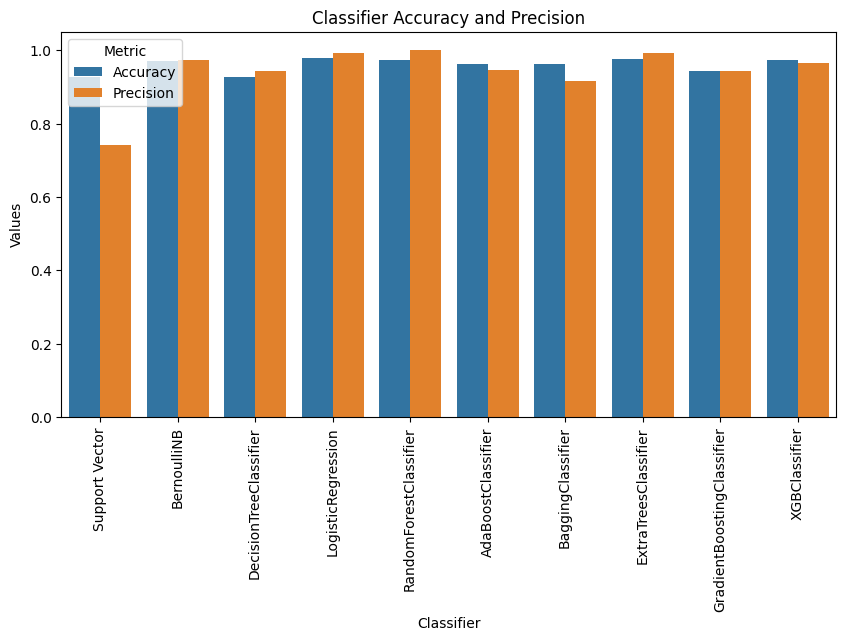

In [85]:
df_melted = comp.melt( id_vars='Classifier', value_vars=['Accuracy', 'Precision'], var_name='Metric', value_name='Values')


plt.figure(figsize=(10, 5))
sns.barplot(x='Classifier', y='Values', hue='Metric', data=df_melted)
plt.xticks(rotation = 90)
plt.title('Classifier Accuracy and Precision')

plt.show()


- we select Random Forest Classifier

In [86]:
import pickle
pickle.dump(CountVectorizer,open('vectoriser.pkl', 'wb'))
pickle.dump(rfc, open('RFclassifier.pkl', 'wb'))